# Assignment 1: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

This is good background reading on [Earth's energy budget](https://earthobservatory.nasa.gov/features/EnergyBalance#:~:text=Areas%20around%20the%20equator%20absorbed,and%20blue%20than%20they%20absorbed.)

For an xarray review, see this [tutorial](https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html)
and the [xarray documentation.](https://xarray.pydata.org/en/stable/index.html)

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6) - this can be done by setting matplotlib plt.rcParams().

In [2]:
import numpy as np
import xarray as xr
import netCDF4 as nc4
import wget
import matplotlib.pyplot as plt
import datetime
import math

# Default Matplotlib Figure size
plt.rcParams['figure.figsize'] = (12,6)


Next, download the NetCDF file using wget (remember Colab requires a '!' before a linux shell command such as wget).

In [3]:
# Opening and Displaying Dataset
cdfurl = "http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc"
!wget "http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc"

--2021-02-17 20:15:59--  http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
Resolving ldeo.columbia.edu (ldeo.columbia.edu)... 129.236.19.40
Connecting to ldeo.columbia.edu (ldeo.columbia.edu)|129.236.19.40|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc [following]
--2021-02-17 20:15:59--  https://www.ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 736656452 (703M) [application/x-netcdf]
Saving to: ‘CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc.6’

CERES_EBAF-TOA_Edit 100%[===================>] 702.53M  95.5MB/s    in 7.5s    

2021-02-17 20:16:07 (93.8 MB/s) - ‘CERES_EBAF-TOA_Edition4.

## 1.1) Open the dataset and display its contents 


In [4]:
file_name = "CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc"
ncf_ds = nc4.Dataset(file_name)
store = xr.backends.NetCDF4DataStore(ncf_ds)
ceres = xr.open_dataset(store)


#ceres = xr.open_dataset(dl_ceres)
print(ceres)

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_m

## 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. Hint: xarray.Dataset.variables can be used to iterate over variables in an xarray dataset and xarray.DataArray.attrs to return the 'long_name' attribute. Another hint: executing xarray.variable in a cell will print the details for that variable, including the attributes. 

In [5]:
# Printing out names of variables
for key in ceres.data_vars:
    print(key, ': ', (ceres.data_vars)[key].long_name)

toa_sw_all_mon :  Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon :  Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon :  Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon :  Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon :  Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon :  Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon :  Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon :  Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon :  Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon :  Incoming Solar Flux, Monthly Means
cldarea_total_daynight_mon :  Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
cldpress_total_daynight_mon :  Cloud Effect

## 2.1) Calculate the time-mean of the entire dataset

In [6]:
def time_mean():
    times = []
    for i in range(len(ceres.time)):
        time = (ceres.time).data[i]
        time = datetime.datetime.utcfromtimestamp(time.tolist()/1e9)
        times.append(time.timestamp())
    avg_time = np.average(times)
    new_datetime = datetime.datetime.fromtimestamp(avg_time)
    return new_datetime

mean = time_mean()
print("\n The time-mean of the entire dataset is ", str(mean))


 The time-mean of the entire dataset is  2008-08-14 18:05:19.211823


## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

Hint: for plotting, an easy starting point is xr.DataArray.plot(), where DataArray can be accessed for each variable in a dataset by xr.Dataset.variable. The general xr.DataArray.plot() is just a wrapper for matplotlib that uses the coordinates for the variables to set "reasonable" plotting parameters and labels. 

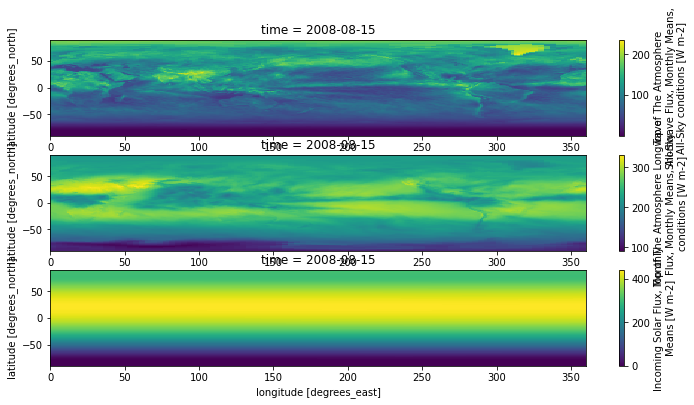

In [7]:
# Plotting TOA at time-mean
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharey=True)
ceres.toa_sw_all_mon.isel(time=101).plot(ax=ax1)
ceres.toa_lw_all_mon.isel(time=101).plot(ax=ax2)
ceres.solar_mon.isel(time=101).plot(ax=ax3)
plt.show()

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions for each variable in order to get this to work.

In [8]:
sum_check = (-1)*ceres.toa_sw_all_mon.isel(time=101) - ceres.toa_lw_all_mon.isel(time=101) + ceres.solar_mon.isel(time=101)

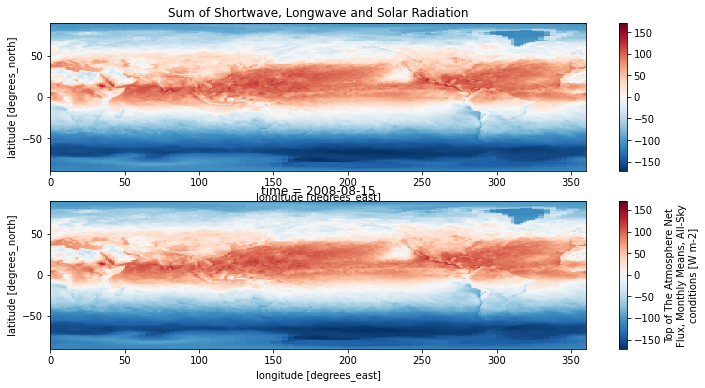

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1, sharey=True)
sum_check.plot(ax=ax1)
ceres.toa_net_all_mon.isel(time=101).plot(ax=ax2)
ax1.set_title('Sum of Shortwave, Longwave and Solar Radiation')
plt.show()

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [10]:
#global_net_toa = (ceres.toa_net_all_mon.isel(time=102) + ceres.toa_net_clr_mon.isel(time=102) + ceres.toa_cre_net_mon.isel(time=102))
#print(global_net_toa)
#mean_toa = (ceres.toa_net_all_mon.isel(time=102).sum())/(len(ceres.toa_net_all_mon.isel(time=102)))
mean_toa = (ceres.toa_net_all_mon.mean())
print(mean_toa)

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729034, dtype=float32)


The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude in radians.)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

In [88]:
  weighted_lat = []
  for i in range(len(ceres.lat)):
      rad = ((ceres.lat).data[i]) * 0.01745329252
      weighted_point = math.cos(rad)
      weighted_lat.append(weighted_point)


    

In [12]:
  mean = np.average(weighted_lat)
  print(mean)

0.6366278526653224


## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [13]:
mean_toa = (((ceres.toa_net_all_mon.isel(time=101)).T)*weighted_lat).mean()
#print(ceres.toa_net_all_mon.data*weighted_lat)
#mean_toa_notime = (((ceres.toa_net_all_mon))*weighted_lat).mean()

print(mean_toa)
#print(mean_toa_notime)


<xarray.DataArray 'toa_net_all_mon' ()>
array(-2.33468518)
Coordinates:
    time     datetime64[ns] 2008-08-15


This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [14]:
in_solar = (((ceres.solar_mon.isel(time=101)).T)*weighted_lat).mean()
print(in_solar)

<xarray.DataArray 'solar_mon' ()>
array(211.26174226)
Coordinates:
    time     datetime64[ns] 2008-08-15


In [15]:
out_long = (((ceres.toa_lw_all_mon.isel(time=101)).T)*weighted_lat).mean()
print(out_long)

<xarray.DataArray 'toa_lw_all_mon' ()>
array(155.05688318)
Coordinates:
    time     datetime64[ns] 2008-08-15


In [16]:
out_short = (((ceres.toa_sw_all_mon.isel(time=101)).T)*weighted_lat).mean()
print(out_short)

<xarray.DataArray 'toa_sw_all_mon' ()>
array(58.53987635)
Coordinates:
    time     datetime64[ns] 2008-08-15


We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [17]:
r = 6371
surf = 0
sphere_surf = 4*math.pow(r,2)*math.pi
print(sphere_surf)

510064471.90978825


In [18]:
dlat = np.radians(ceres.lat[1] - ceres.lat[0])
dlong = np.radians(ceres.lon[1] - ceres.lon[0])
da = []

for i in range(len(weighted_lat)):
  da.append((math.pow(r,2))*weighted_lat[i]*dlat*dlong)

A = da*xr.ones_like(xr.DataArray(ceres.toa_lw_all_mon.data[0])).T
surf = A.data.sum()
print(surf)

510070938.0017305


Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

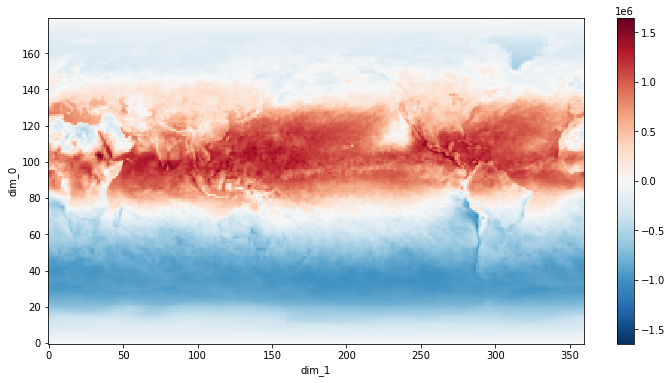

In [20]:
toa_net = ceres.toa_net_all_mon.isel(time=101)
net_rad = A.T*toa_net.data
fig, ax = plt.subplots()
net_rad.plot()

plt.show()

## 4.3) Plot the cumulative sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

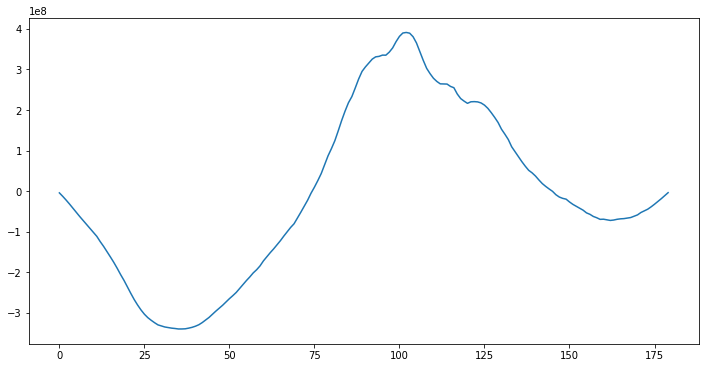

In [48]:
cum_net = np.sum(net_rad.data, axis=1)
plt.plot(cum_net)

You should get a curve that looks something like this: http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.html

## 5.1) Plot the time-mean cloud area fraction (day and night)

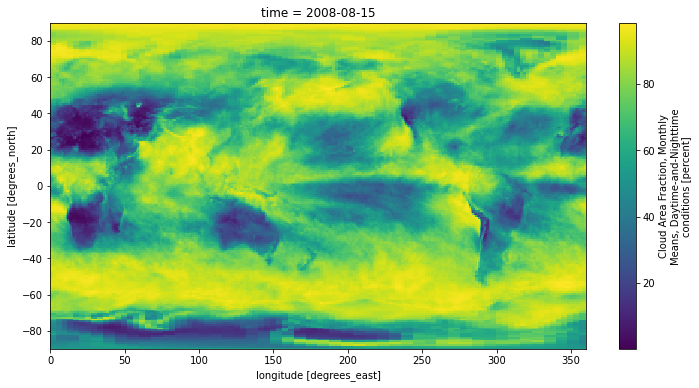

In [35]:
ceres.cldarea_total_daynight_mon.isel(time=101).plot()

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [37]:
lowc = ceres.cldarea_total_daynight_mon <= 25
highc = ceres.cldarea_total_daynight_mon >= 75

print(lowc)

<xarray.DataArray 'cldarea_total_daynight_mon' (time: 203, lat: 180, lon: 360)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False,

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful. This may generate a warning regarding the mean of an empty slice which you can ignore.

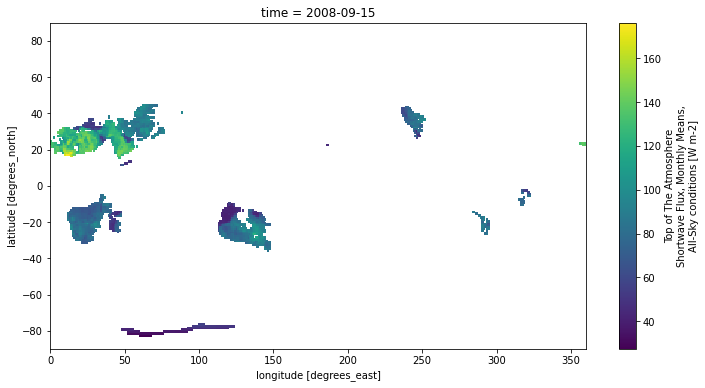

In [43]:
((ceres.toa_sw_all_mon).where(lowc).isel(time=102)).plot()

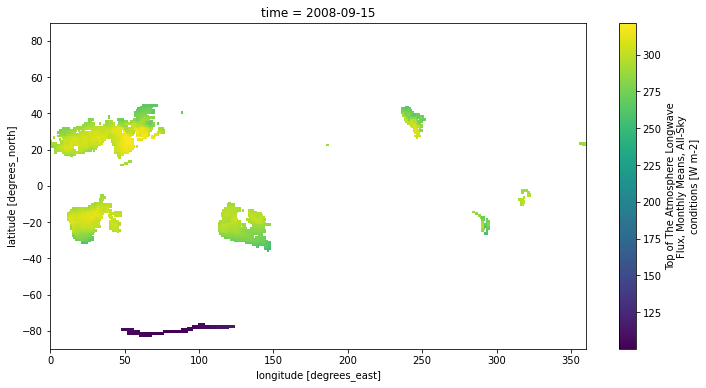

In [44]:
((ceres.toa_lw_all_mon).where(lowc).isel(time=102)).plot()

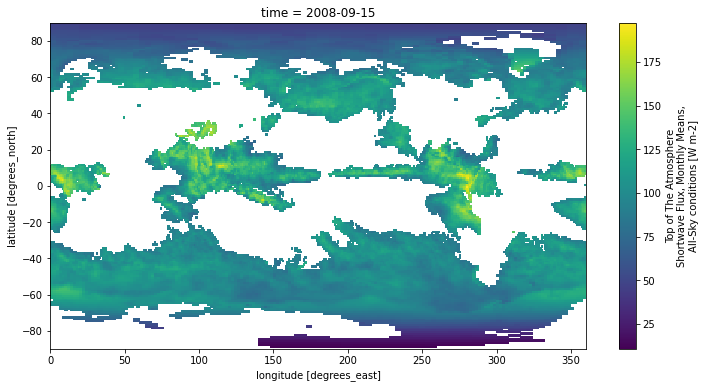

In [47]:
((ceres.toa_sw_all_mon).where(highc).isel(time=102)).plot()

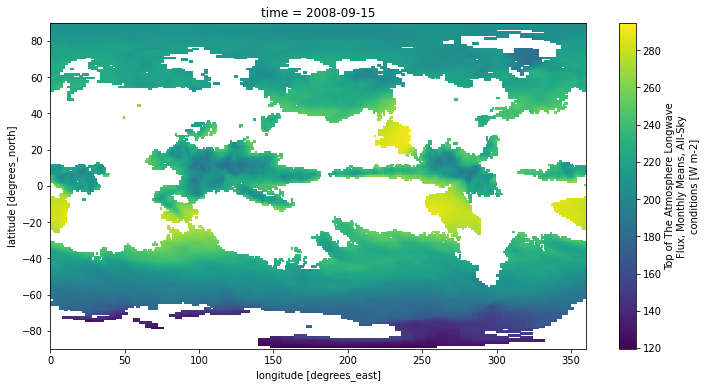

In [46]:
((ceres.toa_lw_all_mon).where(highc).isel(time=102)).plot()

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

In [83]:
sw_hi = ((((ceres.toa_sw_all_mon).isel(time=102).T)*weighted_lat).where(highc).isel(time=102)).mean()
print(sw_rad)

<xarray.DataArray 'toa_net_all_mon' ()>
array(-14.29201245)
Coordinates:
    time     datetime64[ns] 2008-09-15


In [84]:
lw_hi = ((((ceres.toa_lw_all_mon).isel(time=102).T)*weighted_lat).where(highc).isel(time=102)).mean()
print(lw_rad)

<xarray.DataArray 'toa_sw_all_mon' ()>
array(58.53657704)
Coordinates:
    time     datetime64[ns] 2008-09-15


In [85]:
sw_low = ((((ceres.toa_sw_all_mon).isel(time=102).T)*weighted_lat).where(lowc).isel(time=102)).mean()
print(sw_low)

<xarray.DataArray 'toa_sw_all_mon' ()>
array(77.80495923)
Coordinates:
    time     datetime64[ns] 2008-09-15


In [89]:
lw_low = ((((ceres.toa_lw_all_mon).isel(time=102).T)*weighted_lat).where(lowc).isel(time=102)).mean()
print(lw_low)

<xarray.DataArray 'toa_lw_all_mon' ()>
array(393.16783674)
Coordinates:
    time     datetime64[ns] 2008-09-15


What is the overall effect of clouds on shortwave and longwave radiation?